# Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Features

### Description of the Data ####

The provided dataset, `supply_chain_data.csv`, contains detailed information about various products in a supply chain, including their types, stock-keeping units (SKUs), pricing, availability, sales, revenue, customer demographics, stock levels, lead times, order quantities, shipping details, supplier information, manufacturing details, and quality inspection results. The dataset is structured with 100 rows (products) and 24 columns (attributes) for each product.

#### Key Columns and Their Descriptions #####

1. Product type: The category of the product (e.g., haircare, skincare, cosmetics).
2. SKU: The unique identifier for each product.
3. Price: The price of the product.
4. Availability: The current stock availability of the product.
5. Number of products sold: The quantity of the product sold.
6. Revenue generated: The total revenue generated from the product.
7. Customer demographics: The gender or demographic group of the customers (e.g., Male, Female, Non-binary, Unknown).
8. Stock levels: The current stock levels of the product.
9. Lead times: The time taken from placing an order to receiving it.
10. Order quantities: The quantity of products ordered.
11. Shipping times: The time taken to ship the product.
12. Shipping carriers: The carrier used for shipping (e.g., Carrier A, Carrier B, Carrier C).
13. Shipping costs: The cost associated with shipping the product.
14. Supplier name: The name of the supplier providing the product.
15. Location: The location of the supplier (e.g., Mumbai, Delhi, Bangalore, Chennai, Kolkata).
16. Lead time: The time taken by the supplier to deliver the product.
17. Production volumes: The volume of products produced.
18. Manufacturing lead time: The time taken to manufacture the product.
19. Manufacturing costs: The cost associated with manufacturing the product.
20. Inspection results: The result of quality inspection (e.g., Pass, Fail, Pending).
21. Defect rates: The percentage of defective products.
22. Transportation modes: The mode of transportation used (e.g., Road, Air, Sea, Rail).
23. Routes: The route taken for transportation (e.g., Route A, Route B, Route C).
24. Costs: The total costs associated with the product (likely transportation or logistics costs).

## Read Dataset

In [33]:
file_path = "supply_chain_data.csv"  # Update the path to the correct location of the file
df = pd.read_csv(file_path)

# Dataset Exploration

In [34]:
# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

(None,
   Product type   SKU      Price  Availability  Number of products sold  \
 0     haircare  SKU0  69.808006            55                      802   
 1     skincare  SKU1  14.843523            95                      736   
 2     haircare  SKU2  11.319683            34                        8   
 3     skincare  SKU3  61.163343            68                       83   
 4     skincare  SKU4   4.805496            26                      871   
 
    Revenue generated Customer demographics  Stock levels  Lead times  \
 0        8661.996792            Non-binary            58           7   
 1        7460.900065                Female            53          30   
 2        9577.749626               Unknown             1          10   
 3        7766.836426            Non-binary            23          13   
 4        2686.505152            Non-binary             5           3   
 
    Order quantities  ...  Location Lead time  Production volumes  \
 0                96  ...    Mum

# Overview

1. **Rows & Columns**: 100 rows × 24 columns.
2. **Data Types**:
    - **Numerical (float64, int64)**: Price, Availability, Revenue, Lead Times, Manufacturing Costs, etc.
    - **Categorical (object)**: Product type, SKU, Customer demographics, Shipping carriers, etc.
3. **No Missing Values**: Every column has 100 non-null values.

In [35]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


#  Data Cleaning & Preprocessing

## Duplicate Check

In [36]:
# Check for duplicate 
df.duplicated().sum()

np.int64(0)

## Categorical Consistency

In [37]:
# Check unique values in categorical columns to find inconsistencies
categorical_columns = ["Product type", "Customer demographics", "Shipping carriers", "Location", "Inspection results", "Transportation modes", "Routes"]
unique_values = {col: df[col].unique() for col in categorical_columns}
unique_values

{'Product type': array(['haircare', 'skincare', 'cosmetics'], dtype=object),
 'Customer demographics': array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object),
 'Shipping carriers': array(['Carrier B', 'Carrier A', 'Carrier C'], dtype=object),
 'Location': array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object),
 'Inspection results': array(['Pending', 'Fail', 'Pass'], dtype=object),
 'Transportation modes': array(['Road', 'Air', 'Rail', 'Sea'], dtype=object),
 'Routes': array(['Route B', 'Route C', 'Route A'], dtype=object)}

# Findings So Far

- **No Duplicate SKUs**: Each product has a unique identifier.
- **Consistent Categorical Values**: No spelling errors or inconsistencies in labels.
- **Clean Structure**: The dataset is well-formatted, with clearly defined categories.

## Check for Outliers

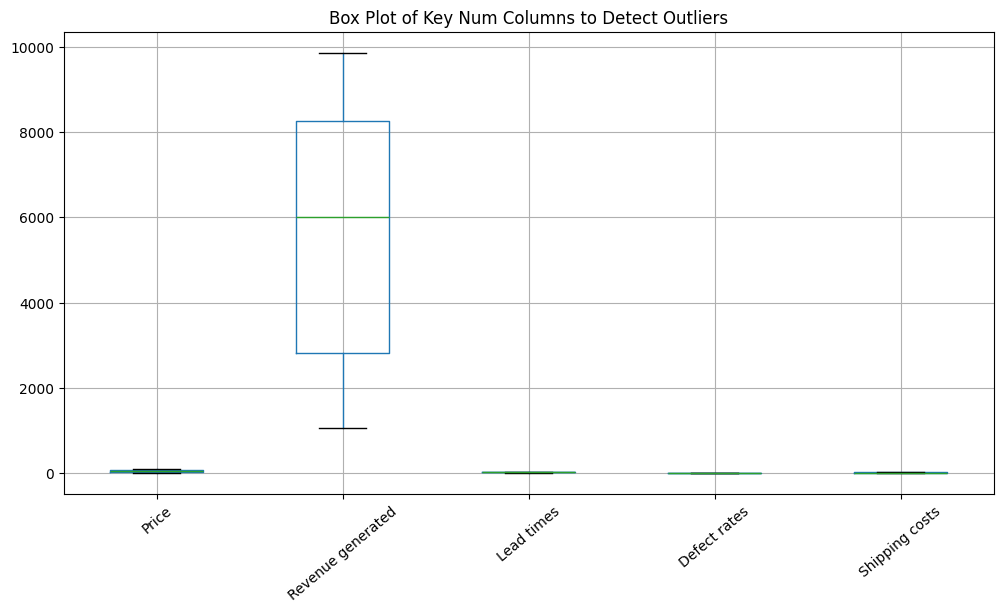

,Price,Revenue generated,Lead times,Defect rates,Shipping costs
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,5776.048187,15.960000,2.277158,5.548149
std,31.168193,2732.841744,8.785801,1.461366,2.651376
min,1.699976,1061.618523,1.000000,0.018608,1.013487
25%,19.597823,2812.847151,8.000000,1.009650,3.540248
50%,51.239831,6006.352023,17.000000,2.141863,5.320534
75%,77.198228,8253.976921,24.000000,3.563995,7.601695
max,99.171329,9866.465458,30.000000,4.939255,9.929816


In [38]:
# Select numerical columns to check for outliers
num_columns = ["Price", "Revenue generated", "Lead times", "Defect rates", "Shipping costs"]

# Generate box plots for numerical columns
plt.figure(figsize=(12, 6))
df[num_columns].boxplot()
plt.xticks(rotation=40)
plt.title("Box Plot of Key Num Columns to Detect Outliers")
plt.show()

# statistical summary
df[num_columns].describe()

### Outlier Analysis Findings

- **Price**: No extreme values; range is reasonable (1.7 to 99.17).
- **Revenue**: Distributed between 1,061 and 9,866, which aligns with different product categories.
- **Lead Times**: Range (1 to 30 days) is realistic.
- **Defect Rates**: No extreme values (0.018 to 4.94%).
- **Shipping Costs**: No extreme values (1.01 to 9.92).

✅ No significant outliers need removal.

### Data Cleaning and Transformation

1. **Column Renaming**: Optimized column names for better readability and consistency by replacing spaces with underscores and using camel case.
2. **Location Formatting**: Standardized city names by capitalizing the first letter of each word.
3. **New Columns**:
    - **Defect_Rate_Percentage**: Added a new column to represent defect rates as a percentage.
    - **Profit_Margin**: Calculated profit margin by subtracting manufacturing costs from revenue generated.

In [39]:
# Optimizing column names
df = df.rename(columns={
    "Product type": "Product_Type",
    "Customer demographics": "Customer_Demographics",
    "Stock levels": "Stock_Levels",
    "Lead time": "Lead_Time",
    "Manufacturing costs": "Manufacturing_Costs",
    "Defect rates": "Defect_Rates",
    "Shipping costs": "Shipping_Costs"
})

In [40]:
# Make city names capitalized only
df["Location"] = df["Location"].str.title()

In [41]:
# Add a (Defect Rate Percentage) column
df["Defect_Rate_Percentage"] = df["Defect_Rates"] / 100

# Profit margin calculation
df["Profit_Margin"] = df["Revenue generated"] - df["Manufacturing_Costs"]

In [42]:
# Checking unique values
print(df["Product_Type"].unique())
print(df["Transportation modes"].unique())

['haircare' 'skincare' 'cosmetics']
['Road' 'Air' 'Rail' 'Sea']


In [43]:
df.head()

,Product_Type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer_Demographics,Stock_Levels,Lead times,Order quantities,...,Production volumes,Manufacturing lead time,Manufacturing_Costs,Inspection results,Defect_Rates,Transportation modes,Routes,Costs,Defect_Rate_Percentage,Profit_Margin
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,0.002264,8615.716913
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,0.048541,7427.283296
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,0.045806,9547.061607
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,0.047466,7731.211684
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,0.031456,2594.439991


## Exporting the Cleaned Data

In [ ]:
cleaned_file_path = "cleaned_supply_chain_data.csv"
# df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data exported to {cleaned_file_path}")

Cleaned data exported to cleaned_supply_chain_data.csv
